In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
print("TF version:-",tf.__version__)
print("TF hub version:-",hub.__version__)

TF version:- 2.8.0
TF hub version:- 0.12.0


In [3]:
tf.config.list_physical_devices()

2023-12-09 23:12:10.464787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-09 23:12:10.604721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-09 23:12:10.605090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
label_df = pd.read_csv('dog-breed-identification/labels.csv')

In [5]:
label_df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [6]:
label_df.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

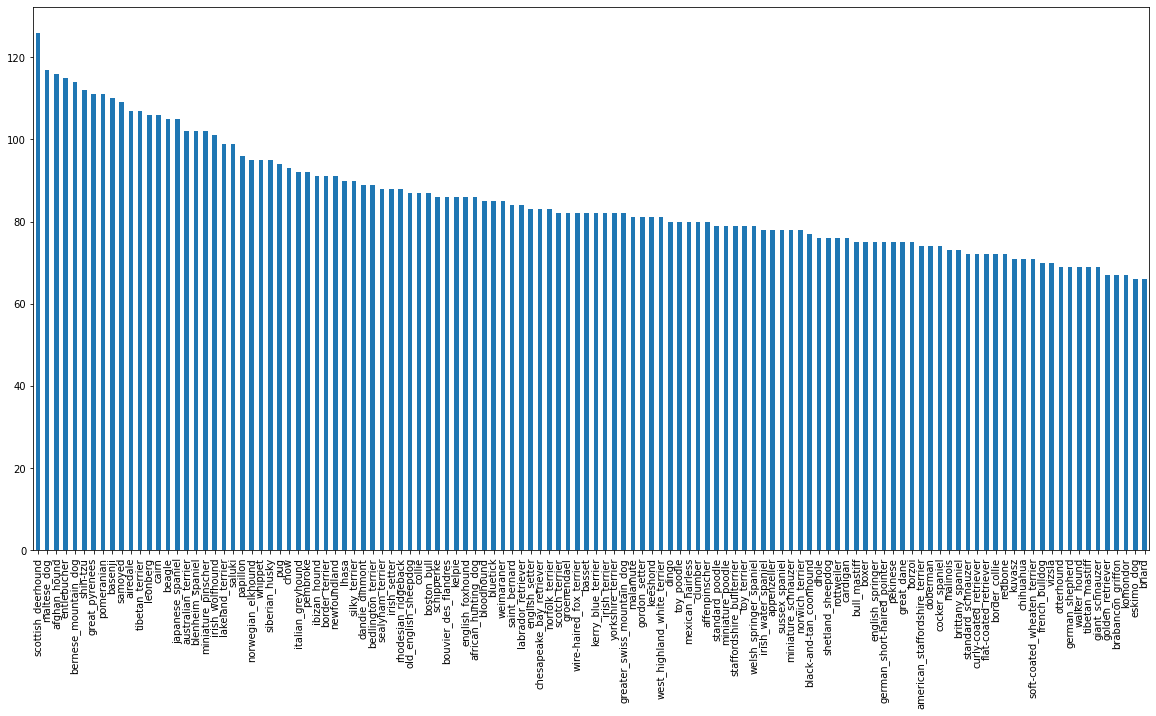

In [7]:
label_df.breed.value_counts().plot.bar(figsize=(20,10));

In [8]:
label_df.breed.value_counts().median()

82.0

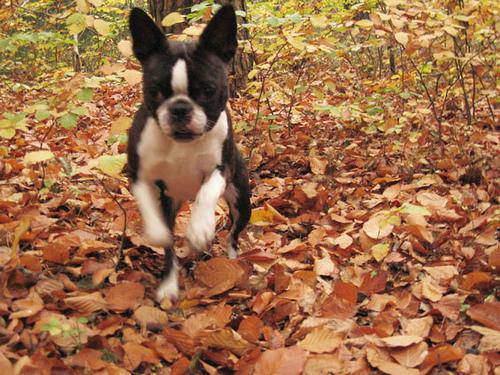

In [9]:
from IPython.display import Image

Image('dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [10]:
filenames = ['dog-breed-identification/train/'+fname+'.jpg' for fname in label_df.id]

In [11]:
len(filenames)

10222

In [12]:
filenames

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'dog-breed-identification/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'dog-breed-identification/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'dog-breed-identification/train/006cc3ddb9dc1bd827479569fcdc52d

In [13]:
import os

len(os.listdir('dog-breed-identification/train/'))==len(filenames)

True

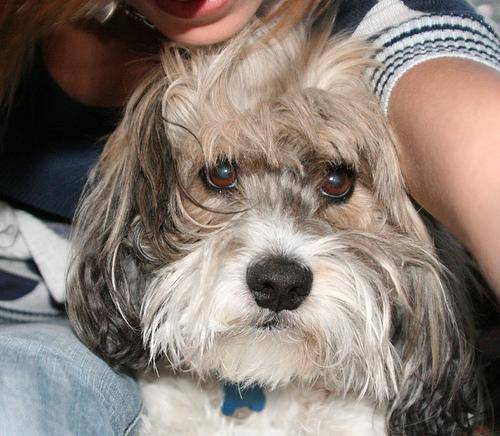

In [14]:
Image(filenames[900])

In [15]:
label_df.breed[900]

'lhasa'

# Finding unique dog breed

In [16]:
labels = label_df['breed'].to_numpy()

print(labels)

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']


In [17]:
unique_breed = np.unique(labels)

In [18]:
len(unique_breed)

120

In [19]:
print(labels[0])

boston_bull


In [20]:
labels[0] == unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
bool_labels = []
for label in labels:
    bool_labels.append(label==unique_breed)

In [22]:
bool_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [23]:
len(bool_labels)

10222

In [24]:
print(labels[0])

boston_bull


In [25]:
np.where(unique_breed==labels[0])

(array([19]),)

In [26]:
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [27]:
labels[0]

'boston_bull'

In [28]:
np.where(unique_breed==labels[0])

(array([19]),)

In [29]:
bool_labels[0].argmax()

19

In [30]:
bool_labels[0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [32]:
X = filenames
y = bool_labels

In [33]:
len(X),len(y)

(10222, 10222)

In [153]:
NUM_IMAGES = len(X)

In [154]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size=0.2)

In [155]:
len(X_train),len(X_valid)

(8177, 2045)

In [156]:
from matplotlib.pyplot import imread
image = imread(filenames[42])

image.shape

(257, 350, 3)

In [157]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [158]:
IMG_SIZE = 224

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.convert_image_dtype(image,tf.float32)
    image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    return image

In [159]:
def get_image_and_label(image_path,label):
    image = preprocess_image(image_path)
    return image,label

In [160]:
get_image_and_label(X[42],y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [161]:
data = tf.data.Dataset.from_tensor_slices(tf.constant(X_valid))

In [162]:
data =  data.map(preprocess_image).batch(32)

In [163]:
data = tf.data.Dataset.from_tensor_slices((tf.constant(X_valid),
                                          tf.constant(y_valid)))
data_batch = data.map(get_image_and_label).batch(32)
data_batch

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [164]:
len(X_valid)

2045

In [165]:
count = 0
for i, j in data_batch.as_numpy_iterator():
    count+=1
    print(len(i),"a")
#     break
print(count)

32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
32 a
29 a
64


In [166]:
(32*6)+8

200

In [167]:
BATCH_SIZE = 32

def create_data_batch(X,y=None,test_data=False,valid_data=False,batch_size=BATCH_SIZE):
    if test_data:
        print("Creating batch for test Data...")
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data_batch = data.map(preprocess_image).batch(batch_size)
        return data_batch
    
    elif valid_data:
        print("Creating batch for validation Data...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        data_batch = data.map(get_image_and_label).batch(batch_size)
        return data_batch
    else:
        print("Creating batch for training Data...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_image_and_label)
        data_batch = data.batch(BATCH_SIZE)
        return data_batch

In [168]:
train_data = create_data_batch(X_train,y_train)
valid_data = create_data_batch(X_valid,y_valid,valid_data=True)


Creating batch for training Data...
Creating batch for validation Data...


In [169]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [170]:
valid_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [171]:
from matplotlib import pyplot as plt

In [172]:
def show_images(image,label):
    plt.figure(figsize=(10,10))
    
    for i in range(0,32):
        ax = plt.subplot(6,6,i+1)
        plt.imshow(image[i])
        plt.title(unique_breed[label[i].argmax()])
        plt.axis("off")

In [173]:
valid_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [174]:
train_image , train_label = next(train_data.as_numpy_iterator())
len(train_image),len(train_label)

(32, 32)

In [175]:
unique_breed[train_label[0].argmax()]

'great_pyrenees'

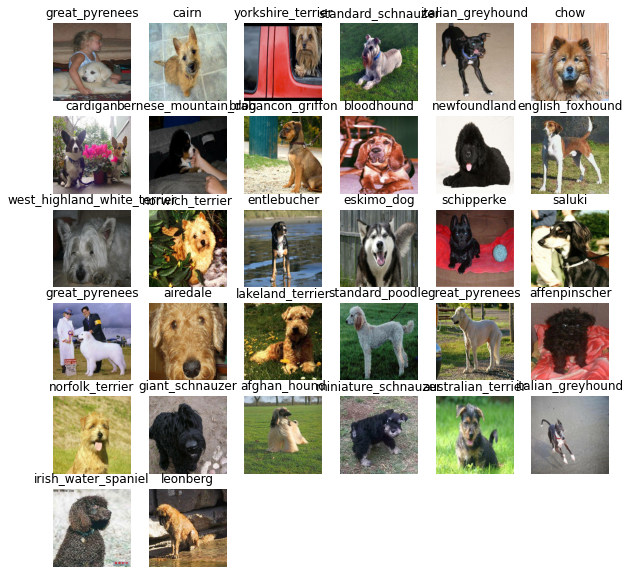

In [176]:
show_images(train_image,train_label)

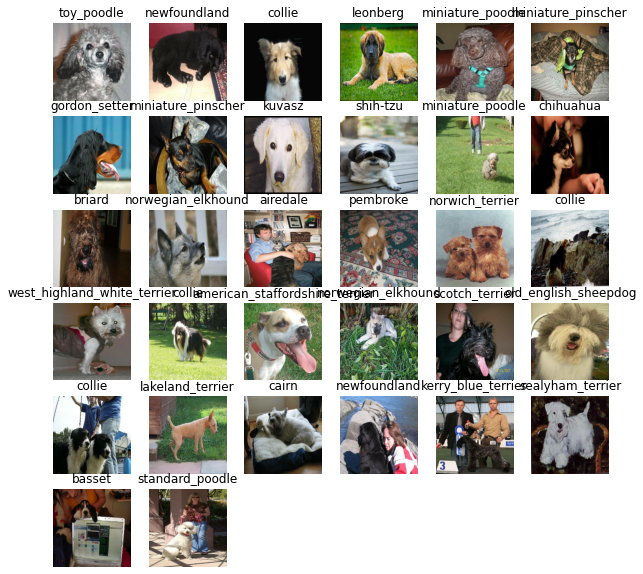

In [177]:
valid_image , valid_label = next(valid_data.as_numpy_iterator())
len(valid_image),len(valid_label)
show_images(valid_image,valid_label)

In [178]:
len(train_image[0])

224

In [179]:
IMG_SIZE = 224
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE = len(unique_breed)
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2"

In [180]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,url=MODEL_URL):
    model = tf.keras.Sequential([
        hub.KerasLayer(url),
        tf.keras.layers.Dense(units=output_shape,
                              activation='softmax')
    ])
    
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )
    
    model.build(input_shape)
    
    return model

In [181]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [3]:
%load_ext tensorboard

In [5]:
%tensorboard --logdir /home/tushar/ml_t/new_projects/logs

In [183]:
import datetime

def create_tensorboard_callback():
    log_dir = os.path.join('/home/tushar/ml_t/new_projects/logs',f'{datetime.datetime.now().strftime("%Y%m%d%H%M%S")}')
    return tf.keras.callbacks.TensorBoard(log_dir)

In [184]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

In [185]:
NUM_EPOCHS = 100

In [188]:
def train_model():
    model = create_model()
    
    tensorboard = create_tensorboard_callback()
    
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=valid_data,
              validation_freq=1,
              callbacks=[tensorboard,early_stopping])
    
    return model

In [189]:
model = train_model()

Epoch 1/100
256/256 [==============================] - 25s 87ms/step - loss: 1.4846 - accuracy: 0.6440 - val_loss: 0.7232 - val_accuracy: 0.7844
Epoch 2/100
256/256 [==============================] - 22s 86ms/step - loss: 0.4086 - accuracy: 0.8809 - val_loss: 0.6809 - val_accuracy: 0.7966
Epoch 3/100
256/256 [==============================] - 22s 85ms/step - loss: 0.2323 - accuracy: 0.9418 - val_loss: 0.6727 - val_accuracy: 0.8039
Epoch 4/100
256/256 [==============================] - 22s 85ms/step - loss: 0.1489 - accuracy: 0.9675 - val_loss: 0.6712 - val_accuracy: 0.7936
Epoch 5/100
256/256 [==============================] - 22s 85ms/step - loss: 0.0995 - accuracy: 0.9841 - val_loss: 0.6780 - val_accuracy: 0.8020
Epoch 6/100
256/256 [==============================] - 22s 85ms/step - loss: 0.0733 - accuracy: 0.9905 - val_loss: 0.6710 - val_accuracy: 0.8093
Epoch 7/100
256/256 [==============================] - 22s 85ms/step - loss: 0.0542 - accuracy: 0.9944 - val_loss: 0.6941 - val_ac

In [190]:
%tensorboard --logdir /home/tushar/ml_t/new_projects/logs 

In [191]:
prediction = model.predict(valid_data,verbose=1)

64/64 [==============================] - 5s 68ms/step


In [193]:
prediction_train = model.predict(train_data,verbose=1)

256/256 [==============================] - 19s 72ms/step


In [194]:
len(prediction)

2045

In [195]:
len(prediction),prediction.shape

(2045, (2045, 120))

In [196]:
prediction[0][prediction[0].argmax()]

0.91333216

In [197]:
prediction[0]

array([2.31337808e-07, 5.89556817e-04, 1.73337384e-07, 3.48246276e-09,
       7.68328423e-09, 4.55442290e-07, 5.09163783e-07, 2.20336975e-08,
       3.63731196e-08, 7.15864843e-08, 1.75444038e-05, 4.42889495e-06,
       1.62613265e-08, 1.72199464e-06, 3.18060984e-07, 8.60004366e-06,
       3.13762882e-08, 2.28313397e-07, 8.17442043e-08, 2.02138324e-07,
       4.44675720e-07, 6.15569107e-09, 5.50908119e-09, 2.08988418e-08,
       4.49646706e-07, 6.83497772e-11, 1.56731474e-07, 4.49576376e-09,
       4.80652034e-08, 5.88074317e-06, 8.23711499e-09, 3.73852345e-06,
       5.31868730e-03, 1.37867060e-08, 8.33157344e-07, 4.60402225e-04,
       9.92979476e-09, 7.53876961e-10, 4.67197800e-08, 7.82980436e-09,
       1.53068453e-04, 6.26692099e-07, 2.18671943e-08, 7.09251879e-07,
       1.17798344e-07, 3.61940842e-08, 3.44142478e-07, 4.25154610e-07,
       2.27078587e-08, 3.17071899e-05, 4.56070848e-04, 1.00956346e-08,
       6.39958444e-06, 4.67823071e-07, 5.73898546e-08, 1.06168443e-08,
      

In [198]:
np.sum(prediction[0])

1.0000001

In [199]:
unique_breed[prediction[1].argmax()]

'newfoundland'

In [200]:
index = 0
# print(prediction[index])
print(f"Max value (probability of prediction): {np.max(prediction[index])}")
print(f"Max index : {np.argmax(prediction[index])}")
print(f"Prediction label : {unique_breed[np.argmax(prediction[index])]}")

Max value (probability of prediction): 0.9133321642875671
Max index : 76
Prediction label : miniature_poodle


In [201]:
def get_image_label(prediction):
    return unique_breed[np.argmax(prediction)]

In [202]:
get_image_label(prediction[0])

'miniature_poodle'

In [203]:
true_valid_image = []
true_valid_label = []

for image,label in valid_data.unbatch().as_numpy_iterator():
    true_valid_image.append(image)
    true_valid_label.append(label)

In [204]:
def unbatchify(data):
    """
    Takes batched data input and return it to seperate array of images and labels
    """
    images = []
    labels = []
    
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(label)
        
    return images,labels

In [205]:
true_valid_image,true_valid_label = unbatchify(valid_data)

In [206]:
len(true_valid_image),len(true_valid_label)

(2045, 2045)

In [207]:
prediction[0]

array([2.31337808e-07, 5.89556817e-04, 1.73337384e-07, 3.48246276e-09,
       7.68328423e-09, 4.55442290e-07, 5.09163783e-07, 2.20336975e-08,
       3.63731196e-08, 7.15864843e-08, 1.75444038e-05, 4.42889495e-06,
       1.62613265e-08, 1.72199464e-06, 3.18060984e-07, 8.60004366e-06,
       3.13762882e-08, 2.28313397e-07, 8.17442043e-08, 2.02138324e-07,
       4.44675720e-07, 6.15569107e-09, 5.50908119e-09, 2.08988418e-08,
       4.49646706e-07, 6.83497772e-11, 1.56731474e-07, 4.49576376e-09,
       4.80652034e-08, 5.88074317e-06, 8.23711499e-09, 3.73852345e-06,
       5.31868730e-03, 1.37867060e-08, 8.33157344e-07, 4.60402225e-04,
       9.92979476e-09, 7.53876961e-10, 4.67197800e-08, 7.82980436e-09,
       1.53068453e-04, 6.26692099e-07, 2.18671943e-08, 7.09251879e-07,
       1.17798344e-07, 3.61940842e-08, 3.44142478e-07, 4.25154610e-07,
       2.27078587e-08, 3.17071899e-05, 4.56070848e-04, 1.00956346e-08,
       6.39958444e-06, 4.67823071e-07, 5.73898546e-08, 1.06168443e-08,
      

In [208]:
get_image_label(true_valid_label[0]),get_image_label(prediction[0])

('toy_poodle', 'miniature_poodle')

In [209]:
def plot_pred(prediction_probabilities,labels,images,n=0):

    pred_prob , label , image = prediction_probabilities[n], labels[n], images[n]

    pred_label = get_image_label(pred_prob)
    label = get_image_label(label)

    color = "green" if pred_label==label else "red"



    plt.imshow(image)


    plt.xticks([])
    plt.yticks([])

#         plt.title(f"{np.max(pred_prob)*100:.0f}% ",color=color)
    plt.title(f"{pred_label}, {np.max(pred_prob)*100:.2f}%, {label}",color=color)
#         break

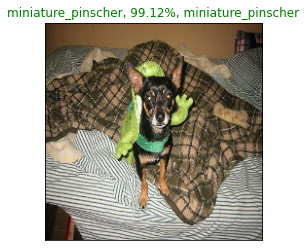

In [210]:
plot_pred(prediction_probabilities=prediction,
          labels=true_valid_label,
          images=true_valid_image,
          n=5)

In [211]:
def plot_pred_image_top_25(prediction_probabilities,labels,images,n=0):
    plt.figure(figsize=(10,10))
    for n in range(25):
        
        ax = plt.subplot(5,5,n+1)
        pred_prob , label , image = prediction_probabilities[n], labels[n], images[n]

        pred_label = get_image_label(pred_prob)
        label = get_image_label(label)

        color = "green" if pred_label==label else "red"



        plt.imshow(image)


        plt.xticks([])
        plt.yticks([])

        plt.title(f"{np.max(pred_prob)*100:.0f}% ",color=color)
#         plt.title(f"{pred_label}, {np.max(pred_prob)*100:.2f}%, {label}",color=color)
#         break

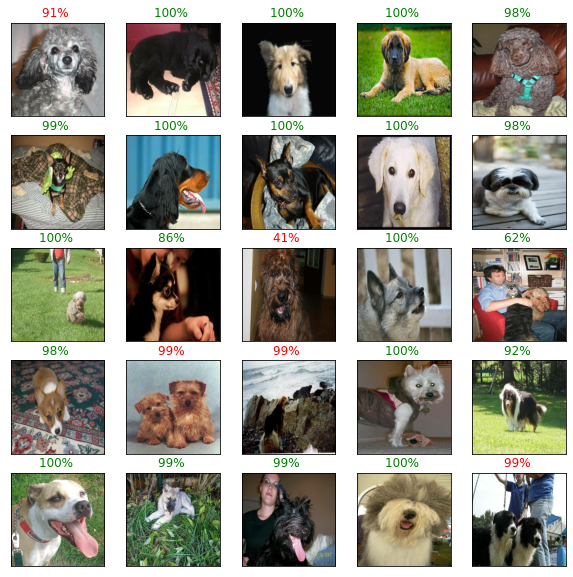

In [212]:
plot_pred_image_top_25(prediction_probabilities=prediction,
          labels=true_valid_label,
          images=true_valid_image,
          n=5)

In [213]:
len(prediction)

2045

In [214]:
prediction[0].argsort()

array([ 25,  90,  92,  37,  67,  72, 101,  95,   3, 115,  27,  63,  22,
        21,  81,   4,  39,  30,  36,  99,  51,  79,  55,  33,  96,  91,
        12, 116,  68,  23, 118,  42,   7,  48, 102,  64, 104,  16,  45,
         8, 103,  88,  38,  28,  61,  54, 117,   9,  18,  98,  44,  78,
        87,  26,   2,  19,  73,  59,  17,   0,  62, 113,  94,  14,  86,
        46,  84,  65,  47,  20,  24,   5,  53,  75,   6,  41,  71,  69,
        43,  34, 111,  58, 112, 106,  13,  60,  57, 109,  83,  80, 107,
        82,  31,  85,  11, 100,  97,  29, 119,  52,  15,  89,  66,  10,
        56,  77,  49,  74,  70, 114,  40, 108,  50,  35,   1,  93,  32,
       105, 110,  76])

In [215]:
prediction[0].argsort()[-10:][::-1]

array([ 76, 110, 105,  32,  93,   1,  35,  50, 108,  40])

In [216]:
prediction[0][prediction[0].argsort()[-10:][::-1]]

array([9.1333216e-01, 5.3851485e-02, 2.4431432e-02, 5.3186873e-03,
       6.6003471e-04, 5.8955682e-04, 4.6040223e-04, 4.5607085e-04,
       3.7255647e-04, 1.5306845e-04], dtype=float32)

In [217]:
unique_breed[prediction[0].argsort()[-10:][::-1]]

array(['miniature_poodle', 'toy_poodle', 'standard_poodle',
       'cocker_spaniel', 'saluki', 'afghan_hound', 'dandie_dinmont',
       'gordon_setter', 'tibetan_mastiff', 'english_setter'], dtype=object)

In [218]:
def plot_top_10_pred_confidence(prediction_probabilites,labels,n=0):
    
    pred_proba,label = prediction_probabilites[n],get_image_label(labels[n])
    
    top_10_index = pred_proba.argsort()[-10:][::-1]
    
    top_10_values = pred_proba[top_10_index]
    
    top_10_labels = unique_breed[top_10_index]
    
    top_plot = plt.bar(range(10),top_10_values,color='red')
    plt.xticks(range(10),labels=top_10_labels,rotation='vertical')
    
    
    if label in top_10_labels:
        top_plot[np.argmax(top_10_labels==label)].set_color("green")

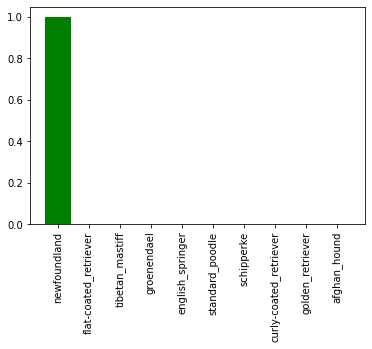

In [219]:
plot_top_10_pred_confidence(prediction,true_valid_label,n=1)

In [220]:
len(X),len(y)

(10222, 10222)

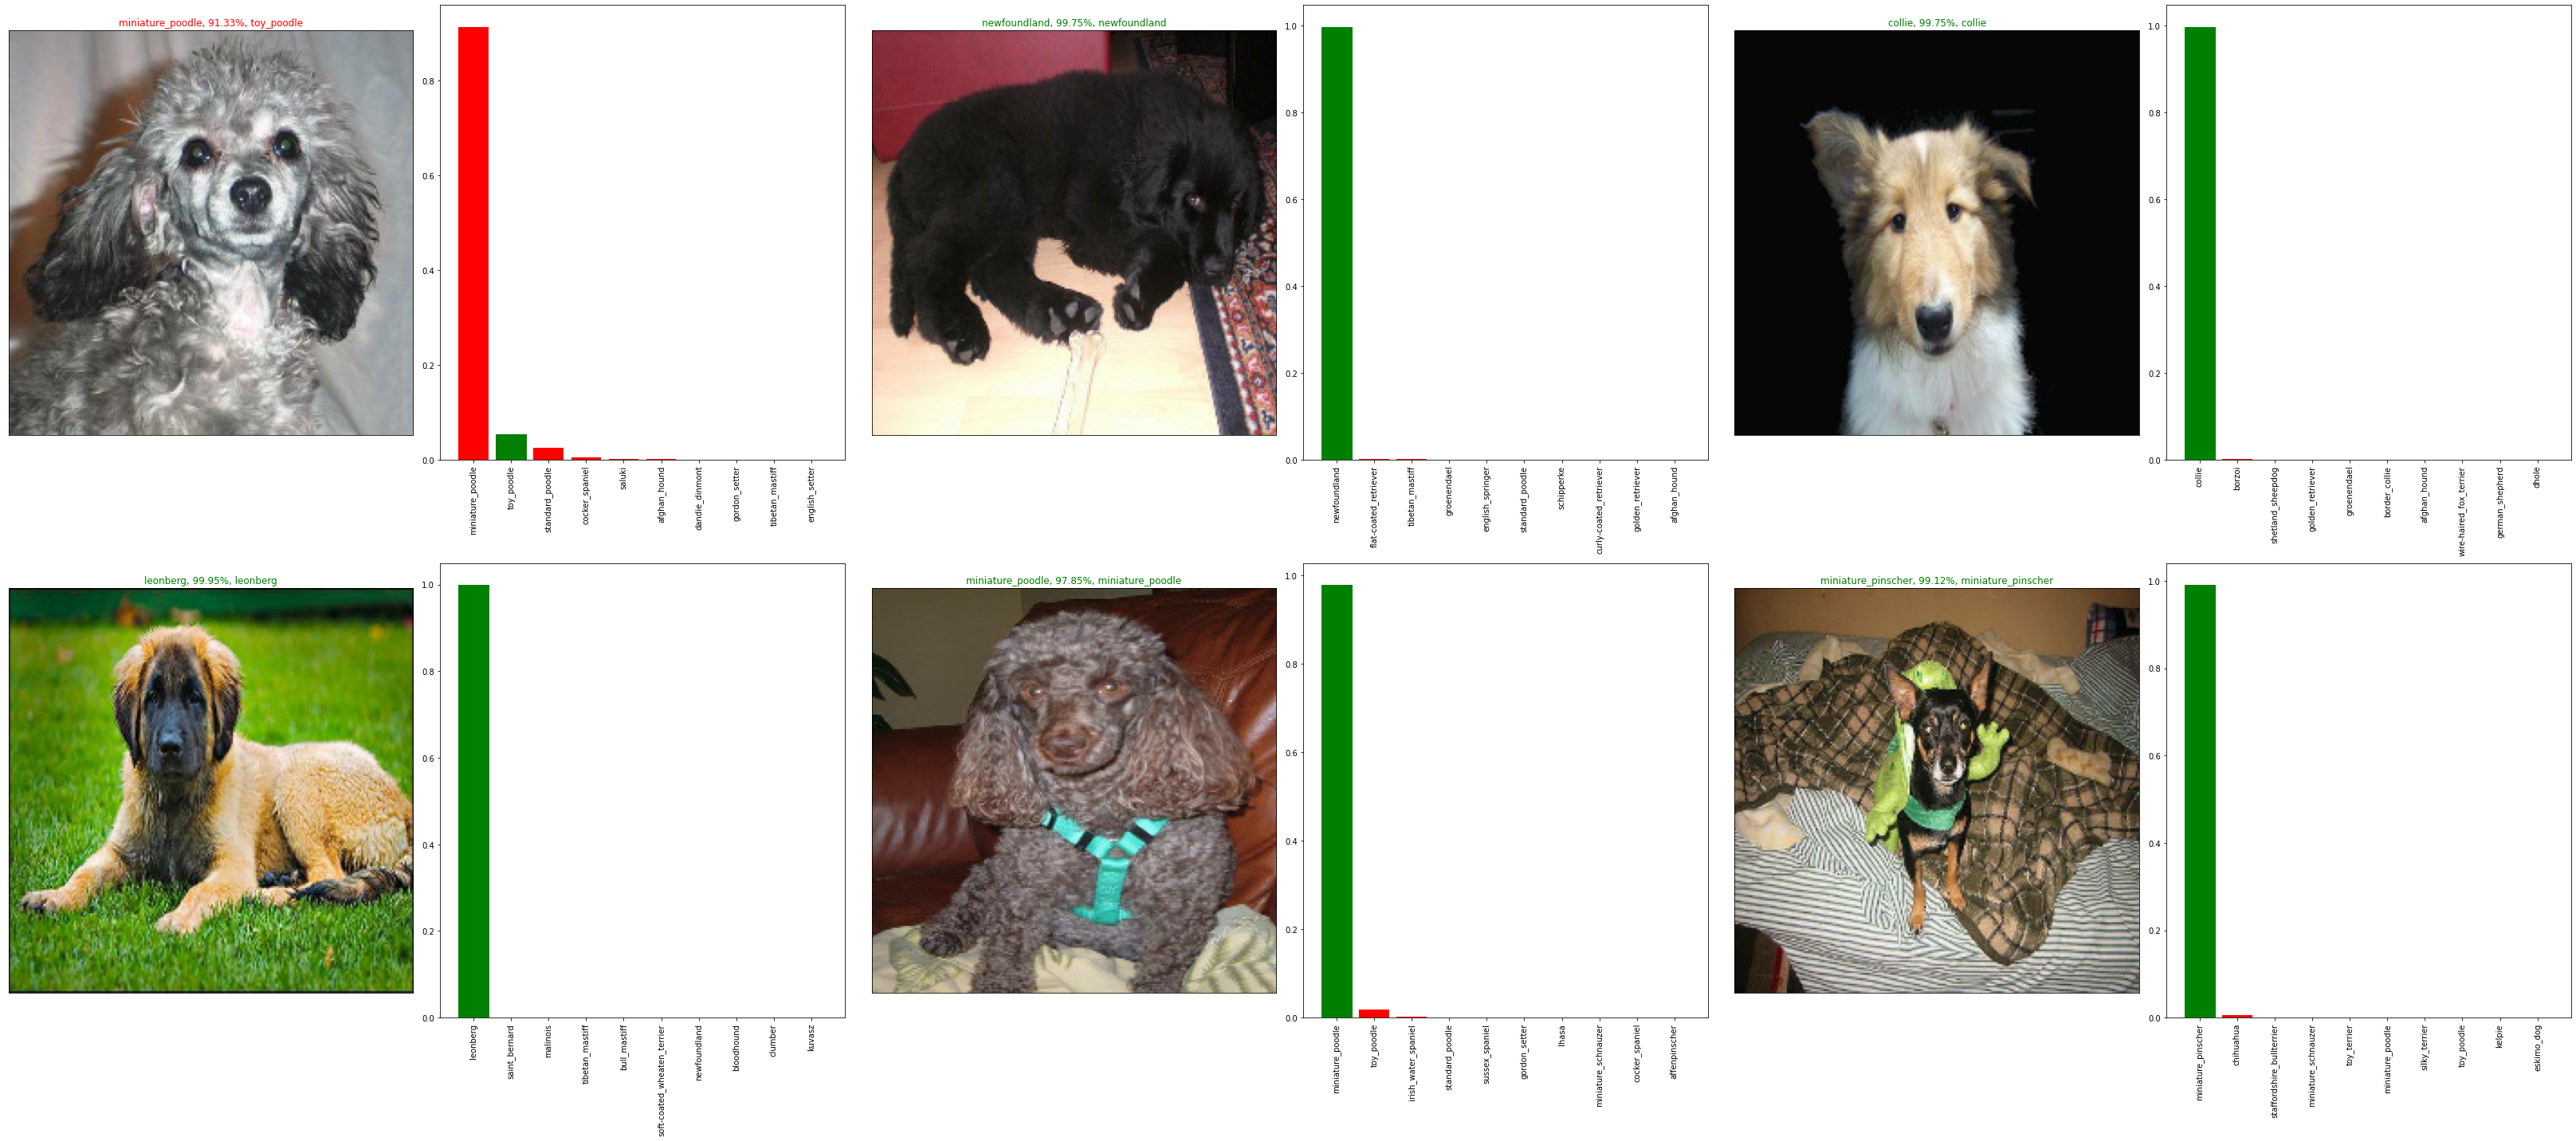

In [304]:
i_multiplier = 0
num_cols = 3
num_rows = 2
num_images = num_cols*num_rows
plt.figure(figsize=(15*num_cols,10*num_rows))

for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_pred(prediction_probabilities=prediction,
          labels=true_valid_label,
          images=true_valid_image,
          n=i+i_multiplier)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_top_10_pred_confidence(prediction,
                                true_valid_label,
                                n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show();

In [222]:
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [260]:
custom_image = "/home/tushar/Downloads/dingo_dog.jpg"

In [261]:
img = preprocess_image(custom_image)

In [262]:
img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.10255603, 0.02804622, 0.05157563],
        [0.08235294, 0.00784314, 0.03137255],
        [0.08235294, 0.00784314, 0.03137255],
        ...,
        [0.09829234, 0.04731194, 0.08260606],
        [0.05015253, 0.01485841, 0.02662312],
        [0.03921569, 0.00392157, 0.01568628]],

       [[0.10255603, 0.02804622, 0.05157563],
        [0.08235294, 0.00784314, 0.03137255],
        [0.08235294, 0.00784314, 0.03137255],
        ...,
        [0.07987832, 0.02889793, 0.06419204],
        [0.06281512, 0.027521  , 0.03928571],
        [0.03921569, 0.00392157, 0.01568628]],

       [[0.09471289, 0.02020308, 0.04373249],
        [0.07664566, 0.00213586, 0.02566527],
        [0.09176609, 0.01725628, 0.04078569],
        ...,
        [0.05882353, 0.00784314, 0.04313726],
        [0.05490196, 0.01960784, 0.03137255],
        [0.04705883, 0.01176471, 0.02352941]],

       ...,

       [[0.24133866, 0.14270419, 0.16221508],
        [0.32

In [226]:
data = tf.data.Dataset.from_tensor_slices(tf.constant([custom_image]))

    # Load and preprocess the image using your existing function
data = data.map(preprocess_image)

    # Batch the dataset
data_batch = data.batch(32)


In [227]:
pred = model.predict(data_batch)

In [228]:
unique_breed[pred[0].argsort()[-10:][::-1]]

array(['dingo', 'malinois', 'eskimo_dog', 'kelpie', 'dhole',
       'ibizan_hound', 'basenji', 'mexican_hairless', 'saluki',
       'toy_terrier'], dtype=object)

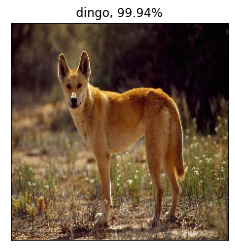

In [229]:
pred_label = get_image_label(pred[0])
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title(f"{pred_label}, {np.max(pred[0])*100:.2f}%")
plt.show();

In [275]:
IMG_SIZE = 224

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.convert_image_dtype(image,tf.float32)
    image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    return image

In [276]:
def preprocess_custom_image(image_path):
    data = tf.data.Dataset.from_tensor_slices(tf.constant([custom_image]))
    data = data.map(preprocess_image)
    data_batch = data.batch(32)
    return data_batch

In [285]:
def predict(model,image_path):
    data_batch = preprocess_custom_image(image_path)
    pred_prob = model.predict(data_batch)[0]
    
    return pred_prob

In [286]:
def plot_cutom_image(pred_prob,image):
    image = preprocess_image(image)
    pred_label = get_image_label(pred_prob)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"{pred_label}, {np.max(pred_prob)*100:.2f}%")
    plt.show();

In [287]:
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [300]:
custom_image = "/home/tushar/Downloads/bluetick_dog.jpg"

In [301]:
pred_prob = predict(model,custom_image)

In [302]:
get_image_label(pred_prob)

'bluetick'

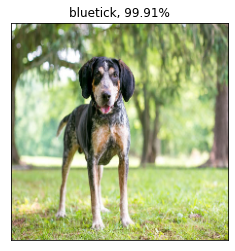

In [303]:
plot_cutom_image(pred_prob,custom_image)

In [305]:
model.save('dog-breed-full-model.h5')

In [6]:
new_model = tf.keras.models.load_model('dog-breed-full-model.h5',custom_objects={"KerasLayer":hub.KerasLayer})

# Show the model architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_4 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
